In [3]:
import pandas as pd

In [3]:
conda install -c anaconda graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install -c anaconda pydot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv(r'covid_hospitalization_sample.csv',encoding='ISO-8859-1')
df = pd.DataFrame(df)
df.info(max_cols=111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 111 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient ID                                 1230 non-null   object 
 1   Patient age quantile                       1230 non-null   int64  
 2   SARS-Cov-2 exam result                     1230 non-null   object 
 3   Patient addmited to regular ward           1230 non-null   int64  
 4   Patient addmited to semi-intensive unit    1230 non-null   int64  
 5   Patient addmited to intensive care unit    1230 non-null   int64  
 6   Hematocrit                                 202 non-null    float64
 7   Hemoglobin                                 202 non-null    float64
 8   Platelets                                  202 non-null    float64
 9   Mean platelet volume                       200 non-null    float64
 10  Red blood Cells        

In [5]:
df = df[["Patient age quantile","SARS-Cov-2 exam result", "Proteina C reativa", 'Neutrophils', "Mean platelet volume",
'Monocytes', "Red blood cell distribution width", "Red blood Cells", 'Platelets',
'Eosinophils', 'Basophils', 'Leukocytes', "Mean corpuscular hemoglobin", "Mean corpuscular volume", "Mean corpuscular hemoglobin concentration",
'Lymphocytes', 'Hemoglobin', 'Hematocrit',"Influenza B rapid test", "Influenza A rapid test"]]

In [12]:
dups_shape = df.pivot_table(index=['SARS-Cov-2 exam result'], aggfunc='size')
dups_shape

SARS-Cov-2 exam result
negative    672
positive    558
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient age quantile                       1230 non-null   int64  
 1   SARS-Cov-2 exam result                     1230 non-null   object 
 2   Proteina C reativa                         175 non-null    float64
 3   Neutrophils                                179 non-null    float64
 4   Mean platelet volume                       200 non-null    float64
 5   Monocytes                                  202 non-null    float64
 6   Red blood cell distribution width          202 non-null    float64
 7   Red blood Cells                            202 non-null    float64
 8   Platelets                                  202 non-null    float64
 9   Eosinophils                                202 non-null    float64
 10  Basophils               

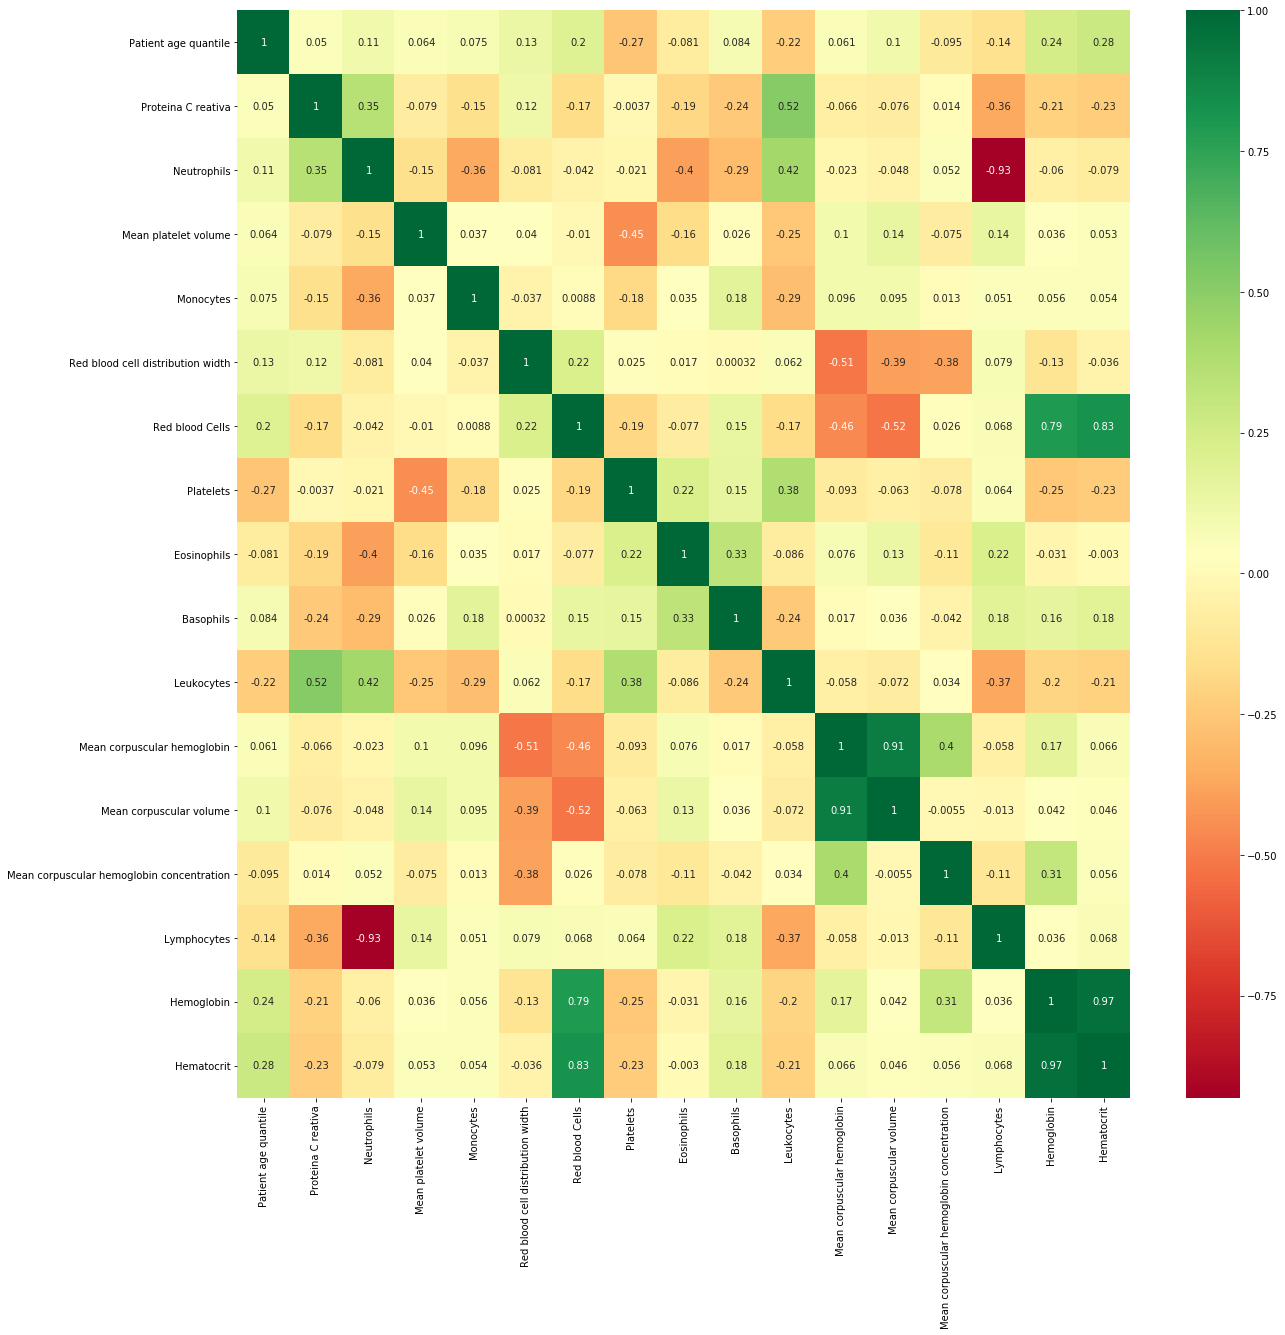

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X = df.iloc[:,2:17]  #independent columns
y = df.iloc[:,1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**According to the Correlation heatmap following groups of features are highly correlated.Hence we have selected only one feature from each group to avoid adding redundant variables into the decision tree.**

1. Mean corpuscular volume, Mean corpuscular hemoglobin
2. Red blood Cells, Hemoglobin, Hematocrit
3. Lymphocytes, Neutrophils

***But in 3rd group of features we chose 'Lymphocytes' instead of 'Neutrophils', since 'Neutrophils' has more missing values.**

In [31]:
# drop above mentioned redundant variables
df = df.drop(['Mean corpuscular hemoglobin','Hemoglobin', 'Hematocrit','Neutrophils'],axis=1)

x1 = df['Influenza B rapid test'].mode()
x2 = df['Influenza A rapid test'].mode()

In [32]:
# Filtered out missing values from one of the features for Blood Test. Which will ultimately filter null values of other features of blood test except for 'Proteina C reativa', where we will be imputing mean for the missing value and mode for the categorical features such as 'Influenza B rapid test' and Influenza B rapid test 
filtered_df = pd.DataFrame(df[df['Red blood Cells'].notnull()])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 1229
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient age quantile                       202 non-null    int64  
 1   SARS-Cov-2 exam result                     202 non-null    object 
 2   Proteina C reativa                         174 non-null    float64
 3   Mean platelet volume                       200 non-null    float64
 4   Monocytes                                  202 non-null    float64
 5   Red blood cell distribution width          202 non-null    float64
 6   Red blood Cells                            202 non-null    float64
 7   Platelets                                  202 non-null    float64
 8   Eosinophils                                202 non-null    float64
 9   Basophils                                  202 non-null    float64
 10  Leukocytes               

In [33]:
filtered_df['Proteina C reativa'].fillna(filtered_df['Proteina C reativa'].mean(), inplace=True)
filtered_df['Mean platelet volume'].fillna(filtered_df['Mean platelet volume'].mean(), inplace=True)
filtered_df['Influenza B rapid test'].fillna("negative", inplace=True)
filtered_df['Influenza A rapid test'].fillna("negative", inplace=True)

X = filtered_df.drop(['SARS-Cov-2 exam result'], axis=1)

# change 'SARS-Cov-2 exam result' into binary 0/1 variable
SARS_Cov_2_exam_result_map = {'negative':0, 'positive': 1}
filtered_df['SARS-Cov-2 exam result'] = filtered_df['SARS-Cov-2 exam result'].map(SARS_Cov_2_exam_result_map)

Y = filtered_df['SARS-Cov-2 exam result']
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 1229
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient age quantile                       202 non-null    int64  
 1   Proteina C reativa                         202 non-null    float64
 2   Mean platelet volume                       202 non-null    float64
 3   Monocytes                                  202 non-null    float64
 4   Red blood cell distribution width          202 non-null    float64
 5   Red blood Cells                            202 non-null    float64
 6   Platelets                                  202 non-null    float64
 7   Eosinophils                                202 non-null    float64
 8   Basophils                                  202 non-null    float64
 9   Leukocytes                                 202 non-null    float64
 10  Mean corpuscular volume  

In [34]:
filtered_df_v2 = df
filtered_df_v2['Proteina C reativa'].fillna(filtered_df_v2['Proteina C reativa'].mean(), inplace=True)
filtered_df_v2['Mean platelet volume'].fillna(filtered_df_v2['Mean platelet volume'].mean(), inplace=True)
filtered_df_v2['Monocytes'].fillna(filtered_df_v2['Monocytes'].mean(), inplace=True)
filtered_df_v2['Red blood cell distribution width'].fillna(filtered_df_v2['Red blood cell distribution width'].mean(), inplace=True)
filtered_df_v2['Red blood Cells'].fillna(filtered_df_v2['Red blood Cells'].mean(), inplace=True)
filtered_df_v2['Platelets'].fillna(filtered_df_v2['Platelets'].mean(), inplace=True)
filtered_df_v2['Eosinophils'].fillna(filtered_df_v2['Eosinophils'].mean(), inplace=True)
filtered_df_v2['Basophils'].fillna(filtered_df_v2['Basophils'].mean(), inplace=True)
filtered_df_v2['Leukocytes'].fillna(filtered_df_v2['Leukocytes'].mean(), inplace=True)
filtered_df_v2['Mean corpuscular volume'].fillna(filtered_df_v2['Mean corpuscular volume'].mean(), inplace=True)
filtered_df_v2['Mean corpuscular hemoglobin concentration'].fillna(filtered_df_v2['Mean corpuscular hemoglobin concentration'].mean(), inplace=True)
filtered_df_v2['Lymphocytes'].fillna(filtered_df_v2['Lymphocytes'].mean(), inplace=True)
filtered_df_v2['Influenza B rapid test'].fillna("negative", inplace=True)
filtered_df_v2['Influenza A rapid test'].fillna("negative", inplace=True)
X_v2 = filtered_df_v2.drop(['SARS-Cov-2 exam result'], axis=1)

# change 'SARS-Cov-2 exam result' into binary 0/1 variable
SARS_Cov_2_exam_result_map = {'negative':0, 'positive': 1}
filtered_df_v2['SARS-Cov-2 exam result'] = filtered_df_v2['SARS-Cov-2 exam result'].map(SARS_Cov_2_exam_result_map)

Y_v2 = filtered_df_v2['SARS-Cov-2 exam result']
X_v2 = pd.get_dummies(X_v2)

filtered_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient age quantile                       1230 non-null   int64  
 1   SARS-Cov-2 exam result                     1230 non-null   int64  
 2   Proteina C reativa                         1230 non-null   float64
 3   Mean platelet volume                       1230 non-null   float64
 4   Monocytes                                  1230 non-null   float64
 5   Red blood cell distribution width          1230 non-null   float64
 6   Red blood Cells                            1230 non-null   float64
 7   Platelets                                  1230 non-null   float64
 8   Eosinophils                                1230 non-null   float64
 9   Basophils                                  1230 non-null   float64
 10  Leukocytes              

**Decision Tree Model  #1**

In [35]:
# Data split for data which excludes missing values
import numpy as np
from sklearn.model_selection import train_test_split
# setting random state
rs = 10
X_mat = X.to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X_mat, Y, test_size=0.3, stratify=Y)

In [36]:
# Decision tree training for data which excludes missing values
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
rs = 10
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [37]:
# Test and Train accuracy of Decision tree which excludes missing values
print("Train accuracy:", model.score(X_train, Y_train))
print("Test accuracy:", model.score(X_test, Y_test))

Train accuracy: 1.0
Test accuracy: 0.6721311475409836


In [38]:
# Feature importance and visualization
from dm_tools import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(model, X.columns)
visualize_decision_tree(model, X.columns, "DT_excluding_missing_values.png")

Leukocytes : 0.276254620722221
Eosinophils : 0.24363297316090637
Influenza A rapid test_negative : 0.09308126720793168
Influenza B rapid test_positive : 0.06976389833681067
Red blood Cells : 0.06375436930506573
Monocytes : 0.0534248925774583
Lymphocytes : 0.052555319316481615
Patient age quantile : 0.035147486497715014
Mean platelet volume : 0.0282047731154503
Platelets : 0.026577574666482053
Red blood cell distribution width : 0.02343165766514333
Mean corpuscular hemoglobin concentration : 0.019526381387619446
Mean corpuscular volume : 0.014644786040714584
Proteina C reativa : 0.0
Influenza A rapid test_positive : 0.0
Influenza B rapid test_negative : 0.0
Basophils : 0.0


**Decision Tree Model  #2**

In [39]:
# Data split for data which includes missing values with imputation
X_v2_mat = X_v2.to_numpy()
X_v2_train, X_v2_test, Y_v2_train, Y_v2_test = train_test_split(X_v2_mat, Y_v2, test_size=0.3, stratify=Y_v2)

In [40]:
# Decision tree training for data which includes missing values with imputation
model_v2 = DecisionTreeClassifier(random_state=rs)
model_v2.fit(X_v2_train, Y_v2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [41]:
# Test and Train accuracy of Decision tree
print("Train accuracy:", model_v2.score(X_v2_train, Y_v2_train))
print("Test accuracy:", model_v2.score(X_v2_test, Y_v2_test))

Train accuracy: 0.7456445993031359
Test accuracy: 0.6937669376693767


In [42]:
# Feature importance and visualization
from dm_tools import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(model_v2, X_v2.columns)
visualize_decision_tree(model_v2, X_v2.columns, "DT_including_missing_values.png")

Patient age quantile : 0.4721586343314598
Leukocytes : 0.14082557838368565
Influenza A rapid test_negative : 0.06732387790960903
Eosinophils : 0.06081406619091354
Proteina C reativa : 0.05783959132559163
Red blood Cells : 0.050701324048881086
Basophils : 0.03598881275819845
Influenza B rapid test_negative : 0.03160203276832659
Monocytes : 0.02679665418693912
Mean corpuscular volume : 0.02419831991118723
Mean platelet volume : 0.019355562590693917
Red blood cell distribution width : 0.006281113714792313
Influenza B rapid test_positive : 0.00354058266167541
Mean corpuscular hemoglobin concentration : 0.0017770288796968771
Influenza A rapid test_positive : 0.0007968203383494934
Lymphocytes : 0.0
Platelets : 0.0


**Compairing Model 1 and 2**

In [43]:
from sklearn.metrics import roc_auc_score

Y_pred_proba_dt = model.predict_proba(X_test)
Y_pred_proba_dt_v2 = model_v2.predict_proba(X_v2_test)


roc_index_dt = roc_auc_score(Y_test, Y_pred_proba_dt[:, 1])
roc_index_dt_v2 = roc_auc_score(Y_v2_test, Y_pred_proba_dt_v2[:, 1])

print("ROC index on test for DT_Model #1:", roc_index_dt)
print("ROC index on test for DT_Model #2:", roc_index_dt_v2)

ROC index on test for DT_Model #1: 0.6794444444444444
ROC index on test for DT_Model #2: 0.7519713049149226


In [44]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, Y_pred_proba_dt[:,1])
fpr_dt_v2, tpr_dt_v2, thresholds_dt_v2 = roc_curve(Y_v2_test, Y_pred_proba_dt_v2[:,1])

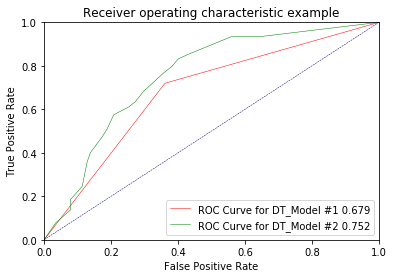

In [45]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_Model #1 {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_v2, tpr_dt_v2, label='ROC Curve for DT_Model #2 {:.3f}'.format(roc_index_dt_v2), color='green', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**By compairing the Accuaracy for Test data and ROC curves of models we choose Model #2 for further optimization**

**Optimized Decision Tree Model using GridSearchCV**

In [46]:
# grid search CV
from sklearn.model_selection import GridSearchCV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(1, 20),
 'min_samples_leaf': range(0, 25, 5)[1:]}
cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_v2_train, Y_v2_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [47]:
# Optimized parameters from GridSearchCV
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 10}


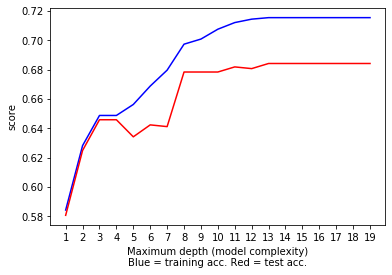

In [48]:
# Visual confirmation of Optimized parameter: Maximum Depth
import matplotlib.pyplot as plt

result_set = cv_1.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

dd = pd.DataFrame(result_set['params'])
index_= list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])

max_depth_train = []
max_depth_test = []

for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [49]:
# Test and Train accuracy of Decision tree
cv_1.best_estimator_.fit(X_v2_train, Y_v2_train)

print("Train accuracy:", cv_1.best_estimator_.score(X_v2_train, Y_v2_train))
print("Test accuracy:", cv_1.best_estimator_.score(X_v2_test, Y_v2_test))

Train accuracy: 0.7154471544715447
Test accuracy: 0.6747967479674797


In [50]:
# Feature importance and visualization analysis on GridSearchCV
from dm_tools import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv_1.best_estimator_, X.columns, 20)
visualize_decision_tree(cv_1.best_estimator_, X.columns, "Optimal_DT_including_missing_values.png")

Patient age quantile : 0.604676877298447
Leukocytes : 0.1708575757284313
Eosinophils : 0.09239903290970043
Influenza A rapid test_positive : 0.08107298050034516
Basophils : 0.03910809397004951
Red blood Cells : 0.011885439593026481
Lymphocytes : 0.0
Mean corpuscular hemoglobin concentration : 0.0
Mean corpuscular volume : 0.0
Influenza B rapid test_negative : 0.0
Influenza A rapid test_negative : 0.0
Influenza B rapid test_positive : 0.0
Platelets : 0.0
Red blood cell distribution width : 0.0
Monocytes : 0.0
Mean platelet volume : 0.0
Proteina C reativa : 0.0


In [51]:
from sklearn.metrics import roc_auc_score

Y_pred_proba_dt_v2 = model_v2.predict_proba(X_v2_test)
Y_pred_proba_dt_opt = cv_1.best_estimator_.predict_proba(X_v2_test)

roc_index_dt_v2 = roc_auc_score(Y_v2_test, Y_pred_proba_dt_v2[:, 1])
roc_index_dt_opt = roc_auc_score(Y_v2_test, Y_pred_proba_dt_opt[:, 1])

print("ROC index on test for DT_Model #1:", roc_index_dt)
print("ROC index on test for DT_Optimized_Model:", roc_index_dt_opt)

ROC index on test for DT_Model #1: 0.6794444444444444
ROC index on test for DT_Optimized_Model: 0.7415070848402205


In [52]:
from sklearn.metrics import roc_curve

fpr_dt_v2, tpr_dt_v2, thresholds_dt_v2 = roc_curve(Y_v2_test, Y_pred_proba_dt_v2[:,1])
fpr_dt_opt, tpr_dt_opt, thresholds_dt_opt = roc_curve(Y_v2_test, Y_pred_proba_dt_opt[:,1])

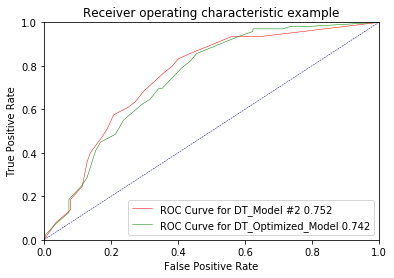

In [53]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt_v2, tpr_dt_v2, label='ROC Curve for DT_Model #2 {:.3f}'.format(roc_index_dt_v2), color='red', lw=0.5)
plt.plot(fpr_dt_opt, tpr_dt_opt, label='ROC Curve for DT_Optimized_Model {:.3f}'.format(roc_index_dt_opt), color='green', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [58]:
with open('best_dt.pickle', 'wb') as f:
    pickle.dump([roc_index_dt_opt,fpr_dt_opt, tpr_dt_opt], f)